In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Read data and check the quality

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


[Text(0, 0, 'age'),
 Text(0, 0, 'anaemia'),
 Text(0, 0, 'creatinine_phosphokinase'),
 Text(0, 0, 'diabetes'),
 Text(0, 0, 'ejection_fraction'),
 Text(0, 0, 'high_blood_pressure'),
 Text(0, 0, 'platelets'),
 Text(0, 0, 'serum_creatinine'),
 Text(0, 0, 'serum_sodium'),
 Text(0, 0, 'sex'),
 Text(0, 0, 'smoking'),
 Text(0, 0, 'time'),
 Text(0, 0, 'DEATH_EVENT')]

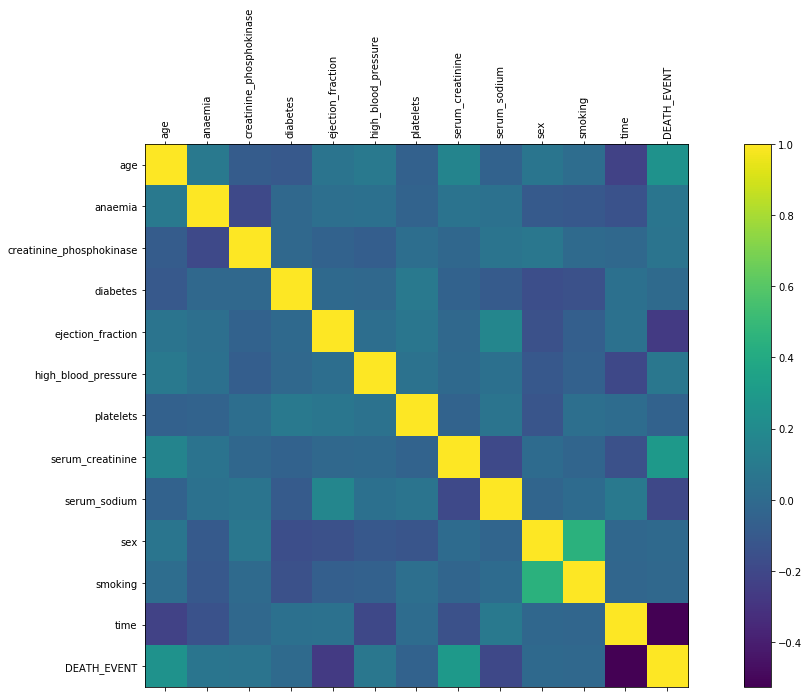

In [6]:
col = data.columns

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr())
fig.colorbar(cax)
ax.set_xticks(np.arange(len(col)))
ax.set_xticklabels(col, rotation=90)
ax.set_yticks(np.arange(len(col)))
ax.set_yticklabels(col)

# Classification

Logistic regression

In [7]:
# Split data to test and training sets
features = data.drop(['DEATH_EVENT','time'], axis=1)
label = data.DEATH_EVENT
X_test, X_train, y_test, y_train = train_test_split(features, label, test_size=0.8, random_state=25)

In [8]:
# Instantiate Logistic Regression model
log = LogisticRegression()
# Train model on training data
log.fit(X_train, y_train)
# Use predict method on the test data
y_pred = log.predict_proba(X_test)
print('Accuracy for test data = %.3f'% log.score(X_test, y_test))
print('Accuracy for train data = %.3f'% log.score(X_train, y_train))

Accuracy for test data = 0.831
Accuracy for train data = 0.713


In [9]:
# Use pipeline method to use Logistic Regression on scaled data
pipe = make_pipeline(StandardScaler(), LogisticRegression())
# Train model on the train set with scaling
pipe.fit(X_train, y_train)
# Use predict method on test data with scaling
y_pred_scaled = pipe.predict_proba(X_test)
log_predict = pipe.predict(X_test)
print('Accuracy for scaled test data = %.3f'% pipe.score(X_test, y_test))
print('Accuracy for scaled train data = %.3f'% pipe.score(X_train, y_train))

Accuracy for scaled test data = 0.831
Accuracy for scaled train data = 0.762


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.879


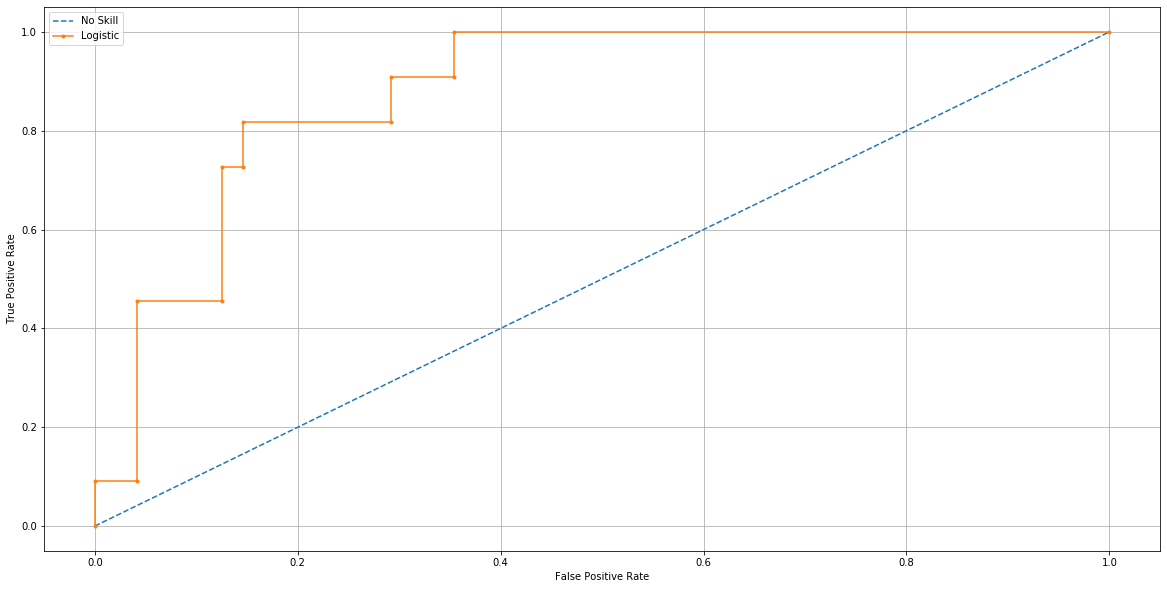

In [10]:
ns_probs = [0 for _ in range(len(y_test))]
# Keep probabilities for the positive outcome only
lr_probs = y_pred[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show the legend
plt.legend()
# Show the plot with grid
plt.grid()
plt.show()

K-Nearest Neighbors Algorithm

In [11]:
# Set grid parameters
param_grid = {'knn__n_neighbors': np.arange(1,20)}
# Use pipeline with Scaler and KNN
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

# Use GridSearchCV with 5-fold cross validation to find best number of neighbours
pipe_cv = GridSearchCV(pipeline, param_grid, cv=5)
# Train model on train data
pipe_cv.fit(X_train, y_train)
print('Best number of neighbors is ',pipe_cv.best_params_['knn__n_neighbors'])

Best number of neighbors is  19


In [12]:
# Instantiate pipeline with Scaler and KNN with best number of neighbours 
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=pipe_cv.best_params_['knn__n_neighbors']))
# Train model on train data with best number of neighbours
pipe_knn.fit(X_train, y_train)
# Use predict method on test data with best number of neighbours
y_pred_scaled_knn = pipe_knn.predict_proba(X_test)
knn_predict = pipe_knn.predict(X_test)

print('Accuracy for scaled test data = %.3f'% pipe_knn.score(X_test, y_test))
print('Accuracy for scaled train data = %.3f'% pipe_knn.score(X_train, y_train))

Accuracy for scaled test data = 0.763
Accuracy for scaled train data = 0.688


Random Forest

In [13]:
# Instantiate pipeline with random forest and scaler
pipe_rfc = make_pipeline(StandardScaler(), RandomForestClassifier())
# Train model on train data
pipe_rfc.fit(X_train,y_train)
# Use predict method on test data
rfc_predict = pipe_rfc.predict(X_test)
print('Accuracy for test data = %.3f'% pipe_rfc.score(X_test, y_test))
print('Accuracy for train data = %.3f'% pipe_rfc.score(X_train, y_train))

Accuracy for test data = 0.814
Accuracy for train data = 1.000


In [14]:
print("=== Confusion Matrix ===\n")
print("------Logistic Regression------")
print(confusion_matrix(y_test, log_predict))
print("-------------Knn------------")
print(confusion_matrix(y_test, knn_predict))
print("-------------Rfc------------")
print(confusion_matrix(y_test, rfc_predict))
print('\n')



print("=== Classification Report ===")
print("-------------Logistic Regression-------------")
print(classification_report(y_test, log_predict))
print("--------------Knn-------------")
print(classification_report(y_test, knn_predict))
print("--------------Rfc-------------")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Confusion Matrix ===

------Logistic Regression------
[[42  6]
 [ 4  7]]
-------------Knn------------
[[45  3]
 [11  0]]
-------------Rfc------------
[[43  5]
 [ 6  5]]


=== Classification Report ===
-------------Logistic Regression-------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        48
           1       0.54      0.64      0.58        11

    accuracy                           0.83        59
   macro avg       0.73      0.76      0.74        59
weighted avg       0.84      0.83      0.84        59

--------------Knn-------------
              precision    recall  f1-score   support

           0       0.80      0.94      0.87        48
           1       0.00      0.00      0.00        11

    accuracy                           0.76        59
   macro avg       0.40      0.47      0.43        59
weighted avg       0.65      0.76      0.70        59

--------------Rfc-------------
              precision    recall

We can see that best results we get for Random Forest